In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
m=base.classes.measurement
s=base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [10]:
conn=engine.connect()
pd.read_sql('select * from measurement limit 5', conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


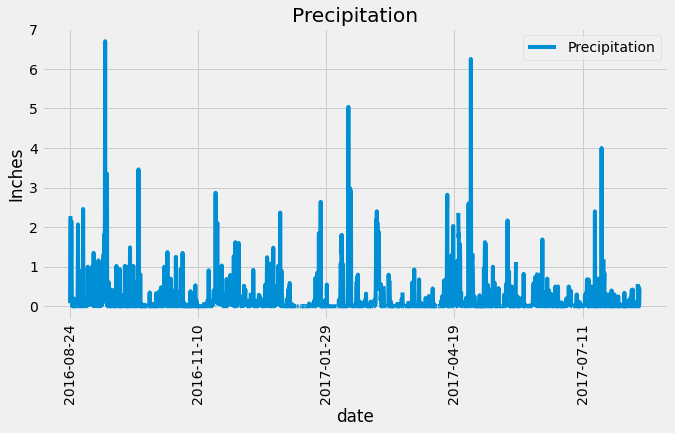

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
 
# Calculate the date 1 year ago from the last data point in the database

#getting the latest date , returning as 2017-08-23
latest_date=session.query(m.date).order_by(m.date.desc()).first()

#calculating the start date (1 year from the latest date)
start_date=dt.date(2017,8,23)-dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results=session.query(m.prcp,m.date).\
        filter(m.date > start_date).\
        order_by(m.date).all()
# list comprehension solution 
rows = [{"date": result[1], "prcp": result[0]} for result in results]
rows
# Load the list comprehension rows into a dataframe, set the index to the date
df=pd.DataFrame(rows).set_index("date")

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize=(10,5))
ax.set_title("Precipitation")
ax.set_ylabel('Inches')
L=plt.legend()
L.get_texts()[0].set_text('Precipitation')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [26]:
conn=engine.connect()
pd.read_sql('select * from station limit 5', conn)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [19]:
# Design a query to show how many stations are available in this dataset?
unique_locations = session.query(s).group_by(s.station).count()
print(f'There are {unique_locations} locations available in this dataset.')

There are 9 locations available in this dataset


In [96]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(m.station, func.count(m.station)).group_by(m.station).all()

#converting into dataframe
df=pd.DataFrame(station_result)
df=df.rename(columns={0:"Stations",1:"Counts"})

#sorting result in descending order 
df=df.sort_values(by=['Counts'],ascending=False)

#getting most active station 
most_active_station=df['Stations'].iloc[0]

print(f'The most active station is {most_active_station}')

The most active station is USC00519281


In [97]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_details=[func.min(m.tobs),func.max(m.tobs),func.avg(m.tobs)]
session.query(*temp_details).filter(m.station==most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

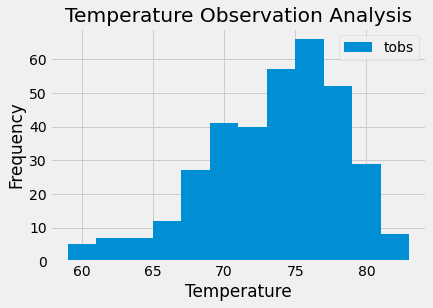

In [99]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#as the count of temp bservations will be the same as count of rows
# hence the station of this question will be the same as above most active station 
temp_details=session.query(m.tobs).filter(m.station==most_active_station).\
                                filter(m.date > start_date).\
                                order_by(m.date).all()
df_temp=pd.DataFrame(temp_details)
df_temp=df_temp.rename(columns={0:"tobs"})

plt.hist(df_temp['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observation Analysis")
plt.legend(["tobs"] ,loc="best")
plt.show()



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
